## CONTENTS

#### 01- Importing libraries and Data
#### Q2- Data privacy
#### Q3- Splitting states into regions: Northeast, Midwest, South, West
#### Q4- Creating high/low activity customer subset.
#### Q5- Merging department to dataframe to find out the highest department. 
#### Q6- Create visualizations to show the distribution of profiles. 
#### Q7- Aggregate the age-group with max, mean, and min variables on a customer-profile level
#### Q8- comparing customer profiles with region and department
#### Q9- Saving visualizations for customer profiles.
### PART 2
#### Create visualizations based on price_range, loyalty_flag, and region.


## 01 Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'D:\CareerFoundry\Python-Instancart Basket Analysis'
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_p1.pkl'))
dept=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
ords_prods_custs.head()

,order_id,user_id,eval_set,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_power,Spender_flag,frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,nb_dependants,fam_status,income
0,3139998,138,prior,28,6,11,3.0,1,5,0,both,0,Chocolate Sandwich Cookies,61,19,5.8,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.980000,Low spender,8.0,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620.0
1,1977647,138,prior,30,6,17,20.0,1,1,1,both,0,Chocolate Sandwich Cookies,61,19,5.8,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,8.475000,Low spender,8.0,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620.0
2,3160996,138,prior,1,5,13,NaN,907,4,0,both,907,Premium Sliced Bacon,106,12,20.0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,9.850000,Low spender,8.0,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620.0
3,2254091,138,prior,10,5,14,6.0,907,1,1,both,907,Premium Sliced Bacon,106,12,20.0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,10.040000,High spender,8.0,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620.0
4,505689,138,prior,9,6,12,7.0,1000,5,0,both,1000,Apricots,18,10,12.9,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.816667,Low spender,8.0,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620.0


In [5]:
ords_prods_custs.describe().round()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,spending_power,frequency,age,nb_dependants,income
count,32404859.0,32404859.0,32404859.0,32404859.0,32404859.0,30328763.0,32404859.0,32404859.0,32404859.0,32404859.0,32404859.0,32404859.0,32399732.0,32404859.0,32404859.0,32404854.0,32404859.0,32404859.0,32404859.0
mean,1710745.0,102937.0,17.0,3.0,13.0,NaN,25599.0,8.0,1.0,25600.0,71.0,10.0,8.0,33.0,9.0,9.0,49.0,2.0,99438.0
std,987299.0,59466.0,18.0,2.0,4.0,0.0,14084.0,7.0,0.0,14086.0,38.0,6.0,4.0,25.0,158.0,7.0,18.0,1.0,43057.0
min,2.0,1.0,1.0,0.0,0.0,0.0,1.0,-128.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,18.0,0.0,25903.0
25%,855947.0,51422.0,5.0,1.0,10.0,5.0,13544.0,3.0,0.0,13544.0,31.0,4.0,4.0,13.0,7.0,6.0,33.0,1.0,67004.0
50%,1711049.0,102616.0,11.0,3.0,13.0,8.0,25302.0,6.0,1.0,25303.0,83.0,9.0,7.0,26.0,8.0,8.0,49.0,2.0,96618.0
75%,2565499.0,154389.0,24.0,5.0,16.0,15.0,37947.0,11.0,1.0,37951.0,107.0,16.0,11.0,47.0,9.0,13.0,65.0,3.0,127912.0
max,3421083.0,206209.0,99.0,6.0,23.0,30.0,49688.0,127.0,1.0,49692.0,134.0,21.0,25.0,99.0,99999.0,30.0,81.0,3.0,593901.0


In [6]:
# Q2 checking for PII columns
ords_prods_custs.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number',
       'order_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge', 'Unnamed: 0',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_power',
       'Spender_flag', 'frequency', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined', 'nb_dependants',
       'fam_status', 'income'],
      dtype='object')

Above are all the columns in the dataframe. This can give the managemnent an easier view to which columns to exclude. First name and Last name are good choices to exclude.

In [7]:
# Q3 Creating a list of regions 
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [8]:
# Creating regional flags
ords_prods_custs.loc[ords_prods_custs['state'].isin(northeast), 'region']='Northeast'
ords_prods_custs.loc[ords_prods_custs['state'].isin(midwest), 'region']='Midwest'
ords_prods_custs.loc[ords_prods_custs['state'].isin(south), 'region']='South'
ords_prods_custs.loc[ords_prods_custs['state'].isin(west), 'region']='West'

In [9]:
# Check fuction
ords_prods_custs['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
# Crosstab of regions with spender flag
crosstab=pd.crosstab(ords_prods_custs['Spender_flag'], ords_prods_custs['region'],  dropna=False)
crosstab

region,Midwest,Northeast,South,West
Spender_flag,,,,
High spender,400269,293812,573841,438876
Low spender,7197056,5428924,10218044,7854037


The data shows the region with the most high spender is "South", following "West", "Midwest", then "Northeast"

In [11]:
# Q4 create a dataframe for high-activity customers with 5 orders or more.
ords_prods_custs.loc[ords_prods_custs['max_order']>=5, 'activity']='high'
ords_prods_custs.loc[ords_prods_custs['max_order']<5, 'activity']='low'

In [12]:
ords_prods_custs['activity'].value_counts(dropna=False)

high    30964564
low      1440295
Name: activity, dtype: int64

In [13]:
# create subset with low-activity customers
LowAct=ords_prods_custs[ords_prods_custs['activity']=='low']

In [14]:
LowAct.shape

(1440295, 37)

In [15]:
# export low-activity customers dataset
LowAct.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low-activity-customers.pkl'))

In [16]:
# exclude low-activity customers from dataset
ords_prods_custs.drop(ords_prods_custs[ords_prods_custs['activity']=='low'].index, inplace=True)

In [17]:
# Q5 dropping unnecessy columns - first_name, last_name, date_joined to prepare Q5
ords_prods_custs = ords_prods_custs.drop(columns = ['eval_set', '_merge', 'Unnamed: 0', 'first_name', 'last_name', 'date_joined'])

In [18]:
# lower memory
ords_prods_custs['income'] = ords_prods_custs['income'].astype('float32')

In [19]:
# lower memory
dept['department_id'] = dept['department_id'].astype('int32')

In [20]:
dept.head(21)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [21]:
#downsizing data to answer Q5
Q5 = ords_prods_custs[['user_id', 'age', 'income', 'product_name', 'department_id', 'fam_status', 'nb_dependants','order_day_of_the_week', 'order_hour_of_day', 'prices','frequency']]

In [22]:
# merging department_id to the dataframe
Q5 = Q5.merge(dept, on = 'department_id', indicator = True)

In [23]:
#modifying columns order and excluding "product_id"
Q5 = Q5[['user_id', 'age', 'income', 'product_name', 'department', 'fam_status', 'nb_dependants','order_day_of_the_week', 'order_hour_of_day', 'prices','frequency']]

In [24]:
Q5.head()

,user_id,age,income,product_name,department,fam_status,nb_dependants,order_day_of_the_week,order_hour_of_day,prices,frequency
0,138,81,49620.0,Chocolate Sandwich Cookies,snacks,married,1,6,11,5.8,8.0
1,138,81,49620.0,Chocolate Sandwich Cookies,snacks,married,1,6,17,5.8,8.0
2,138,81,49620.0,Table Water Crackers,snacks,married,1,5,13,4.4,8.0
3,138,81,49620.0,Organic Simply Naked Pita Chips,snacks,married,1,0,12,4.4,8.0
4,138,81,49620.0,Almonds,snacks,married,1,6,11,4.2,8.0


In [25]:
Q5.describe().round()

,user_id,age,income,nb_dependants,order_day_of_the_week,order_hour_of_day,prices,frequency
count,30964564.0,30964564.0,30964564.0,30964564.0,30964564.0,30964564.0,30959687.0,30964564.0
mean,102928.0,49.0,89369.0,2.0,3.0,13.0,8.0,9.0
std,59471.0,18.0,42558.0,1.0,2.0,4.0,4.0,7.0
min,1.0,18.0,25903.0,0.0,0.0,0.0,1.0,0.0
25%,51409.0,33.0,67292.0,1.0,1.0,10.0,4.0,6.0
50%,102586.0,49.0,96765.0,2.0,3.0,13.0,7.0,7.0
75%,154387.0,65.0,128102.0,3.0,5.0,16.0,11.0,12.0
max,206209.0,81.0,593901.0,3.0,6.0,23.0,25.0,30.0


In [26]:
# Checking which department has the highest sales item
Q5['department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [27]:
# create a subset for items under produce
produce = Q5[Q5['department'].fillna(0).str.contains("produce",na=False)] 
produce

,user_id,age,income,product_name,department,fam_status,nb_dependants,order_day_of_the_week,order_hour_of_day,prices,frequency
3474638,138,81,49620.0,Mini Seedless Watermelon Pack,produce,married,1,5,14,1.7,8.0
3474639,138,81,49620.0,Clementines,produce,married,1,6,17,4.3,8.0
3474640,138,81,49620.0,Classic Baby Creamers Potatoes,produce,married,1,0,12,9.0,8.0
3474641,138,81,49620.0,Packaged Grape Tomatoes,produce,married,1,0,12,11.4,8.0
3474642,138,81,49620.0,Packaged Grape Tomatoes,produce,married,1,2,9,11.4,8.0
...,...,...,...,...,...,...,...,...,...,...,...
12553906,169498,47,150640.0,Organic Bunch Beets,produce,married,3,6,15,8.8,4.0
12553907,169498,47,150640.0,Organic Bunch Beets,produce,married,3,3,16,8.8,4.0
12553908,169498,47,150640.0,Cucumber Kirby,produce,married,3,6,16,13.2,4.0
12553909,169498,47,150640.0,Cucumber Kirby,produce,married,3,6,15,13.2,4.0


In [28]:
# looking up for top 10 items under produce
produce['product_name'].value_counts(dropna=False).head(10)

Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Organic Avocado           168267
Large Lemon               145397
Strawberries              136330
Limes                     134751
Organic Raspberries       132945
Name: product_name, dtype: int64

In [29]:
# Looking for top 10 items overall
Q5['product_name'].value_counts(dropna=False).head(10)

Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Organic Avocado           168267
Large Lemon               145397
Strawberries              136330
Limes                     134751
Organic Whole Milk        133514
Name: product_name, dtype: int64

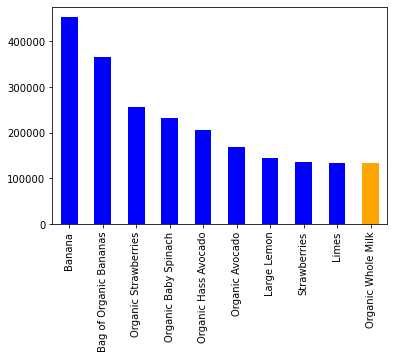

In [30]:
prodcut10 = Q5['product_name'].value_counts(dropna=False).head(10).plot.bar(color =['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange'])

For the top ten items, 9 of them are from 'produce' and the 10th item is from 'dairy eggs'. The top three items are banana, organic banana and organic strawberry.

In [31]:
Q5

,user_id,age,income,product_name,department,fam_status,nb_dependants,order_day_of_the_week,order_hour_of_day,prices,frequency
0,138,81,49620.0,Chocolate Sandwich Cookies,snacks,married,1,6,11,5.8,8.0
1,138,81,49620.0,Chocolate Sandwich Cookies,snacks,married,1,6,17,5.8,8.0
2,138,81,49620.0,Table Water Crackers,snacks,married,1,5,13,4.4,8.0
3,138,81,49620.0,Organic Simply Naked Pita Chips,snacks,married,1,0,12,4.4,8.0
4,138,81,49620.0,Almonds,snacks,married,1,6,11,4.2,8.0
...,...,...,...,...,...,...,...,...,...,...,...
30964559,137486,25,64469.0,AdvanceCare Oral Electrolyte Solution - Cherry...,babies,married,2,4,8,8.0,9.0
30964560,168325,52,43709.0,Kids Sensible Foods Broccoli Littles,babies,married,2,4,15,2.0,23.0
30964561,160916,21,43619.0,Stage 1 - Just Prunes,babies,living with parents and siblings,2,1,13,7.2,6.0
30964562,160916,21,43619.0,Stage 1 - Just Prunes,babies,living with parents and siblings,2,4,7,7.2,6.0


In [32]:
#creating age group 
#young adults range from 18-24
Q5.loc[Q5['age'] <=20, 'age_group'] = '20 and younger'
Q5.loc[(Q5['age'] >20) & (Q5['age'] <=40), 'age_group'] = '21-40' 
Q5.loc[(Q5['age'] >40) & (Q5['age'] <=60), 'age_group'] = '41-60'
Q5.loc[Q5['age'] >60, 'age_group'] = '61+'

In [33]:
Q5['age_group'].value_counts()

61+               10112607
41-60              9703524
21-40              9693705
20 and younger     1454728
Name: age_group, dtype: int64

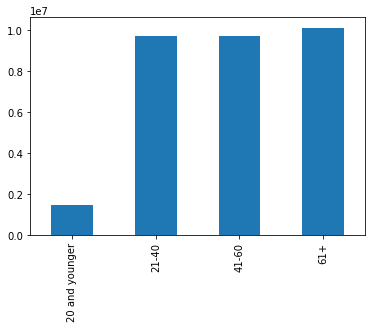

In [34]:
agebar10 = Q5['age_group'].value_counts().sort_index().plot.bar()

In [35]:
#aggregating for age group with income
Q5.groupby('age_group').agg({'income': ['mean', 'min', 'max']}).round()

income                   
                    mean      min       max
age_group                                  
20 and younger   70496.0  25972.0  396364.0
21-40            70682.0  25903.0  397929.0
41-60           116011.0  29017.0  592409.0
61+             115992.0  29001.0  593901.0

In [36]:
#creating income group - deleting all duplicate entries
users=Q5[['user_id', 'income', 'age']].drop_duplicates()

In [37]:
users.describe()

,user_id,income,age
count,162631.000000,162631.000000,162631.000000
mean,103082.597887,95687.335938,49.531375
std,59529.254972,42742.625000,18.475491
min,1.000000,25903.000000,18.000000
25%,51579.500000,61717.500000,34.000000
50%,103059.000000,94292.000000,49.000000
75%,154644.500000,125165.000000,66.000000
max,206209.000000,593901.000000,81.000000


In [38]:
#creating income group based on users df
#coustomers income range 
users.loc[users['income'] <=20000, 'income_group_users'] = '$20,000 and less'
users.loc[(users['income'] >20001) & (users['income'] <=40000), 'income_group_users'] = '$20,001-$40,000'
users.loc[(users['income'] >40000) & (users['income'] <=60000), 'income_group_users'] = '$40,001-$60,000' 
users.loc[users['income'] >60000, 'income_group_users'] = '$60,001 and more'

In [39]:
users['income_group_users'].value_counts()

$60,001 and more    123825
$40,001-$60,000      26181
$20,001-$40,000      12625
Name: income_group_users, dtype: int64

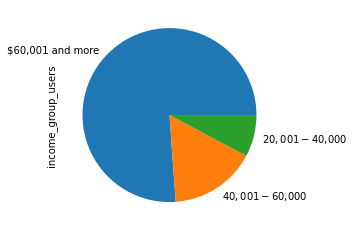

In [40]:
users10 = users['income_group_users'].value_counts(dropna=False).plot.pie()

In [41]:
#creating age group based on users df
#coustomers age_group_u 
users.loc[users['age'] <=20, 'age_group_users'] = '20 and younger'
users.loc[(users['age'] >20) & (users['age'] <=40), 'age_group_users'] = '21-40' 
users.loc[(users['age'] >40) & (users['age'] <=60), 'age_group_users'] = '41-60'
users.loc[users['age'] >60, 'age_group_users'] = '61+'

In [42]:
users['age_group_users'].value_counts()

61+               53289
41-60             51154
21-40             50532
20 and younger     7656
Name: age_group_users, dtype: int64

In [43]:
users['age_group_users'].value_counts().to_clipboard()

In [44]:
# Check fuction
Q5['fam_status'].value_counts(dropna=False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

<AxesSubplot:ylabel='fam_status'>

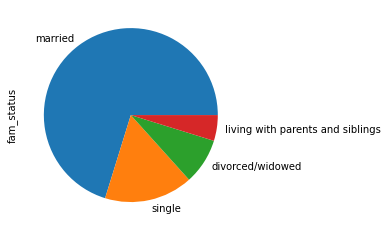

In [45]:
fam10 = Q5['fam_status'].value_counts(dropna=False).plot.pie()
fam10

In [46]:
# Crosstab of family status with number of dependants
ct_fam=pd.crosstab(Q5['fam_status'], Q5['age_group'],  dropna=False)
ct_fam

age_group,20 and younger,21-40,41-60,61+
fam_status,,,,
divorced/widowed,0,0,112170,2533101
living with parents and siblings,1109763,371409,0,0
married,0,6887002,7277203,7579506
single,344965,2435294,2314151,0


In [47]:
# Single adult which are 21+
Single_adult = 2435294+2314151
Single_adult

4749445

In [48]:
# Crosstab of family status with age_group
ct_age=pd.crosstab(Q5['age_group'], Q5['nb_dependants'],  dropna=False)
ct_age

nb_dependants,0,1,2,3
age_group,,,,
20 and younger,344965,382084,356794,370885
21-40,2435294,2402629,2435920,2419862
41-60,2426321,2458366,2362279,2456558
61+,2533101,2476027,2578268,2525211


In [49]:
# Young parents which are age 20 and under with one or more dependants.
Young_parent = 382084+356794+370885
Young_parent

1109763

In [50]:
#Q6 saving the graphs
prodcut10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product10.png'))
agebar10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'agebar10.png'))
fam10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam10.png'))


In [51]:
# Q7 Aggregate the age-group with max, mean, and min variables on a customer-profile level
Q5.groupby('age_group').agg({'frequency': ['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']}).round(5)

frequency              prices           
                    mean  min   max     mean  min   max
age_group                                              
20 and younger   9.99066  0.0  30.0  7.79483  1.0  25.0
21-40            9.94367  0.0  30.0  7.78417  1.0  25.0
41-60            9.98178  0.0  30.0  7.79058  1.0  25.0
61+              9.94159  0.0  30.0  7.79614  1.0  25.0

In [52]:
Q5.groupby('fam_status').agg({'frequency': ['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']}).round(5)

frequency              prices           
                                      mean  min   max     mean  min   max
fam_status                                                               
divorced/widowed                   9.87455  0.0  30.0  7.80101  1.0  25.0
living with parents and siblings   9.86997  0.0  30.0  7.80060  1.0  25.0
married                            9.97040  0.0  30.0  7.79028  1.0  25.0
single                             9.96877  0.0  30.0  7.78360  1.0  25.0

In [53]:
# Q8 comparing customer profiles with region and department
# age with region
Q8age1=pd.crosstab(Q5['age_group'], ords_prods_custs['region'],  dropna=False)
Q8age1

region,Midwest,Northeast,South,West
age_group,,,,
20 and younger,331092,249926,465442,356281
21-40,2196016,1655931,3106836,2391063
41-60,2198779,1635225,3115594,2406149
61+,2273865,1729689,3255984,2487965


In [54]:
# age with department
Q8age2=pd.crosstab(Q5['age_group'], Q5['department'],  dropna=False)
Q8age2

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
20 and younger,8283,19831,51629,117392,32020,1595,47597,243669,46805,38800,100851,33604,12388,32062,3378,1863,83823,20392,4875,425594,128277
21-40,45528,127833,350869,798017,210014,10508,318225,1628678,314567,257399,659358,216861,80807,209126,20192,10742,555180,131712,28697,2846652,872740
41-60,45188,129709,352313,811805,211277,10419,316767,1616891,313495,258285,664156,219413,80218,211158,20495,10719,561756,134856,28918,2840630,865056
61+,45628,133019,366017,844687,217539,10929,329485,1687944,328967,267652,697366,229979,82578,222435,20703,11087,581946,137346,30570,2966397,900333


In [55]:
# family status with region
Q8fam=pd.crosstab(Q5['fam_status'], ords_prods_custs['region'],  dropna=False)
Q8fam

region,Midwest,Northeast,South,West
fam_status,,,,
divorced/widowed,590981,453505,861252,643921
living with parents and siblings,335865,252980,477732,360800
married,4922618,3704670,6971966,5366225
single,1150288,859616,1632906,1270512


In [56]:
# family status with department
Q8fam2=pd.crosstab(Q5['fam_status'], Q5['department'],  dropna=False)
Q8fam2

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
fam_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,11859,34351,95735,220879,56590,2676,84268,442602,86749,70251,183957,58446,21814,57621,5064,2842,151891,36313,8025,777094,236244
living with parents and siblings,8379,19381,53684,119107,33198,1633,48477,250207,48119,39542,102993,33349,12394,32344,3317,1815,85845,20201,5338,430539,131310
married,99421,287683,785749,1807453,471220,23818,712577,3632599,702333,578298,1489390,495150,179136,476559,45516,23882,1252956,297900,64120,6373293,1944658
single,24968,68977,185660,424462,109842,5324,166752,851774,166633,134045,345391,112912,42647,108257,10871,5872,292013,69892,15577,1498347,454194


In [57]:
# Q9 saving all graphs and visualizations
prodcut10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_bar10.png'))
agebar10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'agebar10.png'))
users10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'userspie10.png'))
fam10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fampie10.png'))

In [58]:
ords_prods_custs.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_Task4_10.pkl'))

In [59]:
Q5.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_Task4_10_Q5.pkl'))

## PART 2

In [60]:
ords_prods_custs.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_power,Spender_flag,frequency,frequency_flag,gender,state,age,nb_dependants,fam_status,income,region,activity
0,3139998,138,28,6,11,3.0,1,5,0,Chocolate Sandwich Cookies,61,19,5.8,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.980000,Low spender,8.0,frequent customer,Male,Minnesota,81,1,married,49620.0,Midwest,high
1,1977647,138,30,6,17,20.0,1,1,1,Chocolate Sandwich Cookies,61,19,5.8,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,8.475000,Low spender,8.0,frequent customer,Male,Minnesota,81,1,married,49620.0,Midwest,high
2,3160996,138,1,5,13,NaN,907,4,0,Premium Sliced Bacon,106,12,20.0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,9.850000,Low spender,8.0,frequent customer,Male,Minnesota,81,1,married,49620.0,Midwest,high
3,2254091,138,10,5,14,6.0,907,1,1,Premium Sliced Bacon,106,12,20.0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,10.040000,High spender,8.0,frequent customer,Male,Minnesota,81,1,married,49620.0,Midwest,high
4,505689,138,9,6,12,7.0,1000,5,0,Apricots,18,10,12.9,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.816667,Low spender,8.0,frequent customer,Male,Minnesota,81,1,married,49620.0,Midwest,high


<AxesSubplot:ylabel='price_range_loc'>

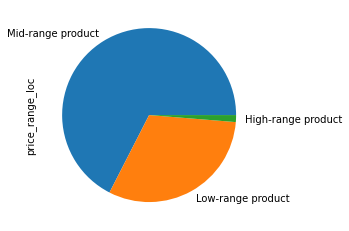

In [61]:
# creating a pie chart for price_range
Pricepie = ords_prods_custs['price_range_loc'].value_counts(dropna=False).plot.pie()
Pricepie

In [62]:
#saving pie chart on price range 
Pricepie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pricepie10.png'))

<AxesSubplot:ylabel='loyalty_flag'>

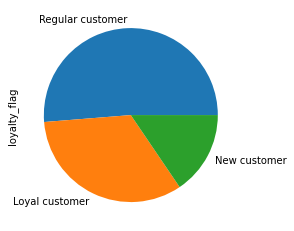

In [63]:
# creating a pie chart for loyalty_flag
loyaltypie = ords_prods_custs['loyalty_flag'].value_counts(dropna=False).plot.pie()
loyaltypie

<AxesSubplot:>

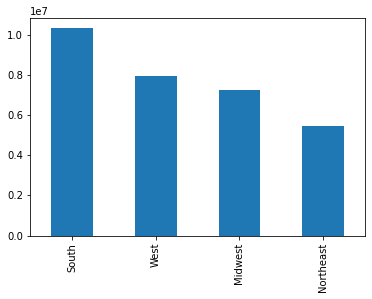

In [64]:
# creating a pie chart for region
regionbar = ords_prods_custs['region'].value_counts(dropna=False).plot.bar()
regionbar

<AxesSubplot:ylabel='fam_status'>

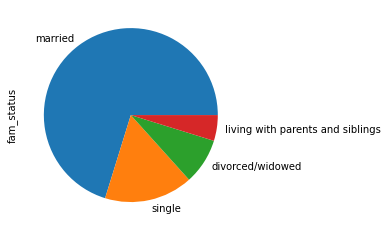

In [65]:
# creating a pie chart for fam_status
famstatuspie = ords_prods_custs['fam_status'].value_counts(dropna=False).plot.pie()
famstatuspie

In [66]:
famfreq=pd.crosstab(ords_prods_custs['fam_status'], ords_prods_custs['frequency_flag'],  dropna=False)
famfreq

frequency_flag,Non-frequent customer,Regular customer,frequent customer
fam_status,,,
divorced/widowed,243934,582214,1819123
living with parents and siblings,138646,312012,1030514
married,2039823,4815063,14888825
single,472572,1155824,3466014


In [67]:
pd.crosstab(Q5['fam_status'], ords_prods_custs['frequency_flag'],  dropna=False)

frequency_flag,Non-frequent customer,Regular customer,frequent customer
fam_status,,,
divorced/widowed,226910,558093,1764656
living with parents and siblings,125408,309681,992288
married,1845242,4577267,14542970
single,431088,1072876,3409358


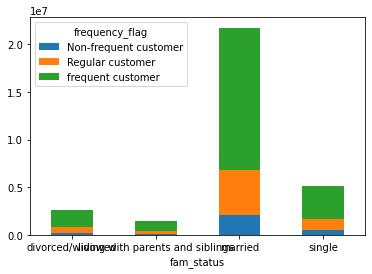

In [68]:
famfreqbar = famfreq.plot(kind="bar", stacked=True, rot=0)


In [69]:
agefreq=pd.crosstab(Q5['age_group'], ords_prods_custs['frequency_flag'],  dropna=False)
agefreq

frequency_flag,Non-frequent customer,Regular customer,frequent customer
age_group,,,
20 and younger,123052,303984,975705
21-40,825827,2046248,6477771
41-60,815423,2040314,6500010
61+,864346,2127371,6755786


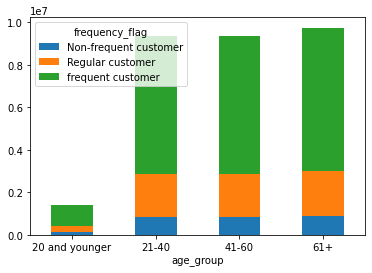

In [70]:
agefreqbar = agefreq.plot(kind="bar", stacked=True, rot=0)

In [71]:
Pricepie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pricepie10.png'))
loyaltypie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyaltypie10.png'))
regionbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regionbar10.png'))
famstatuspie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'famstatuspie10.png'))
famfreqbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'famfreqbar10.png'))
agefreqbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'agefreqbar10.png'))